C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\r7bthvstxw-1\hatchback: 181 images
C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\r7bthvstxw-1\motorcycle: 121 images
C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\r7bthvstxw-1\pickup: 478 images
C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\r7bthvstxw-1\sedan: 400 images
C:\Users\asmun\OneDrive - NTNU\H24\Datadrevet\it3212-data-driven-software\datasets\r7bthvstxw-1\suv: 129 images
Total images: 1309
Processed images shape: (2390, 128, 128, 3)
Balanced label distribution: Counter({'hatchback': 478, 'motorcycle': 478, 'pickup': 478, 'sedan': 478, 'suv': 478})
Counter({'hatchback': 478, 'motorcycle': 478, 'pickup': 478, 'sedan': 478, 'suv': 478})
Training size: 1673, Validation size: 358, Test size: 359
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step
12/12 ━━━━━━━

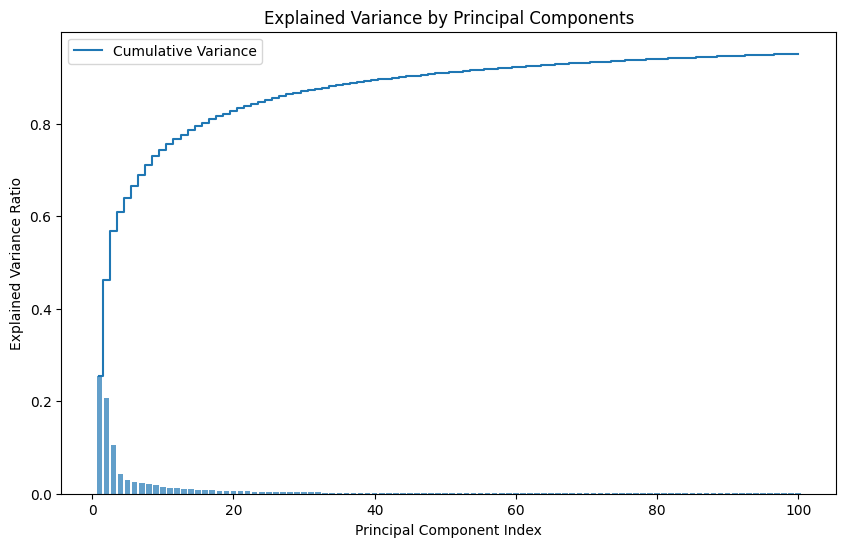

In [14]:
%run preprocessing.ipynb

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assume features_train_flat, features_test_flat, y_train, y_test are prepared

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='auto', random_state=42)
svm_rbf.fit(features_train_pca, y_train_encoded)

# Predict and evaluate
y_pred_rbf = svm_rbf.predict(features_test_pca)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test_encoded, y_pred_rbf)
print('Test Accuracy with RBF Kernel: {:.2f}'.format(accuracy_rbf))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_rbf)
print('\nConfusion Matrix:')
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test_encoded, y_pred_rbf, target_names=label_encoder.classes_)
print('\nClassification Report:')
print(class_report)


Test Accuracy with RBF Kernel: 0.20

Confusion Matrix:
[[ 0  0  0 79  0]
 [ 0  0  0 57  0]
 [ 0  0  0 69  0]
 [ 0  0  0 72  0]
 [ 0  0  0 82  0]]

Classification Report:
              precision    recall  f1-score   support

   hatchback       0.00      0.00      0.00        79
  motorcycle       0.00      0.00      0.00        57
      pickup       0.00      0.00      0.00        69
       sedan       0.20      1.00      0.33        72
         suv       0.00      0.00      0.00        82

    accuracy                           0.20       359
   macro avg       0.04      0.20      0.07       359
weighted avg       0.04      0.20      0.07       359



C:\Users\asmun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asmun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asmun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score
# import numpy as np

# # Assume features_train_flat, features_val_flat, features_test_flat are already extracted and flattened
# # Assume y_train, y_val, y_test contain the corresponding labels

# # Encode labels as integers
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_val_encoded = label_encoder.transform(y_val)
# y_test_encoded = label_encoder.transform(y_test)

# # Train the Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees in the forest
# rf_model.fit(features_train_pca, y_train_encoded)

# # Predict on the validation set
# y_val_pred = rf_model.predict(features_val_pca)

# # Evaluate the performance
# val_accuracy = accuracy_score(y_val_encoded, y_val_pred)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # Predict on the test set
# y_test_pred = rf_model.predict(features_test_pca)

# # Evaluate the performance on the test set
# test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
# print(f"Test Accuracy: {test_accuracy:.4f}")

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_))
